In [1]:
!pip install pandas nltk emoji
!pip install textblob

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pandas as pd

In [8]:
df = pd.read_excel('dataset_final4.xlsx')

In [3]:
df

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,...,num_comments,mean_num_comments,erc,av_erc,st_erc,er,min_er,max_er,av_er,st_er
0,giannis_an34,804699,107,BTalBkFFbS3,5,8,NaN,NaN,While walking off the court today fans were te...,0,...,1811,222.000000,0.002251,0.000276,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282
1,giannis_an34,804699,107,BSuylNHBDUq,2,8,nationalsiblingsday,"francisadetokunbo, thanasis_ante43",#NationalSiblingsDay @francisadetokunbo @thana...,1,...,342,956.500000,0.000425,0.001189,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936
2,giannis_an34,804699,107,BSuwz-FBb_z,2,7,nationalsiblingsday,"kostas__ante13, alex_ante34, thanasis_ante43",The best brothers/Friends ever. They always ha...,1,...,102,1076.500000,0.000127,0.001338,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218
3,elenimenegaki,636249,78,BS0MNFuBU0a,4,10,"eleni, elenimenegaki, blackandwhite",NaN,#eleni #elenimenegaki #blackandwhite,3,...,670,2357.933333,0.001053,0.003706,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847
4,elenimenegaki,636249,78,BTBnELSBPu4,2,15,"eleni, elenimenegaki, styling","serendipitygr, sinacheri",#eleni #elenimenegaki Φόρεμα @serendipitygr #s...,3,...,538,2366.733333,0.000846,0.003720,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,andreanafrangoudes,11820,869,BTYQL08ACvz,4,10,"gymlife, morningroutine",NaN,Let's do it 💪 #gymlife #morningroutine,2,...,2,1.714286,0.000169,0.000145,0.000135,0.033756,0.022927,0.045685,0.034832,0.006010
15484,andreanafrangoudes,11820,869,BTbVjelgkzz,5,15,"stonpiretotoushow, gettingshowready",NaN,Ετοιμαζόμαστεεεε 😱 see u all on Monday!! #ston...,2,...,0,1.857143,0.000000,0.000157,0.000128,0.035787,0.022927,0.045685,0.034687,0.006010
15485,marinoskonsolos,44213,167,BStivGcAkKw,1,20,NaN,NaN,""" Sometimes if you wear suits for too long, it...",0,...,47,33.500000,0.001063,0.000758,0.000240,0.168141,0.141678,0.150861,0.146269,0.006493
15486,marinoskonsolos,44213,167,BSv5u9VA5Le,2,18,"elastithesimou, tvseries, downtownmagazine, ph...",NaN,""" The more you act like a lady, the more i act...",4,...,41,36.500000,0.000927,0.000826,0.000336,0.141678,0.150861,0.168141,0.159501,0.012219


#### Sentiment Analysis with NLTK

In [9]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import emoji

In [10]:
# Download required NLTK resources
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
# Remove '\n' from the 'caption' column
df['caption'] = df['caption'].str.replace('\n', ' ')

In [12]:
# Function to calculate sentiment score (ignoring mentions) and rescale to [0, 2]
def calculate_sentiment_score(text):
    if isinstance(text, str):  # Check if the value is a string
        # Replace mentions with empty string
        text = " ".join([word for word in text.split() if not word.startswith('@')])
        # Calculate sentiment score using VADER (Valence Aware Dictionary and sEntiment Reasoner)
        sia = SentimentIntensityAnalyzer()
        # Get the VADER sentiment score in the range [-1, 1]
        vader_score = sia.polarity_scores(text)['compound']
        # Rescale the VADER sentiment score to the desired range [0, 2]
        rescaled_score = (vader_score + 1)  # Scaled from [-1, 1] to [0, 2]
        return rescaled_score
    return 1.0  # Return 1.0 (neutral) for non-text values

# Apply sentiment analysis to the 'caption' column and create a new 'sentiment_score' column
df['sentiment_score'] = df['caption'].apply(calculate_sentiment_score)

df

,username,num_followers,num_followings,post_id,day_of_week,hour,hashtags,mentions,caption,num_hashtags,...,mean_num_comments,erc,av_erc,st_erc,er,min_er,max_er,av_er,st_er,sentiment_score
0,giannis_an34,804699,107,BTalBkFFbS3,5,8,NaN,NaN,While walking off the court today fans were te...,0,...,222.000000,0.002251,0.000276,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282,1.9738
1,giannis_an34,804699,107,BSuylNHBDUq,2,8,nationalsiblingsday,"francisadetokunbo, thanasis_ante43",#NationalSiblingsDay @francisadetokunbo @thana...,1,...,956.500000,0.000425,0.001189,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936,1.0000
2,giannis_an34,804699,107,BSuwz-FBb_z,2,7,nationalsiblingsday,"kostas__ante13, alex_ante34, thanasis_ante43",The best brothers/Friends ever. They always ha...,1,...,1076.500000,0.000127,0.001338,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218,1.6696
3,elenimenegaki,636249,78,BS0MNFuBU0a,4,10,"eleni, elenimenegaki, blackandwhite",NaN,#eleni #elenimenegaki #blackandwhite,3,...,2357.933333,0.001053,0.003706,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847,1.0000
4,elenimenegaki,636249,78,BTBnELSBPu4,2,15,"eleni, elenimenegaki, styling","serendipitygr, sinacheri",#eleni #elenimenegaki Φόρεμα @serendipitygr #s...,3,...,2366.733333,0.000846,0.003720,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,andreanafrangoudes,11820,869,BTYQL08ACvz,4,10,"gymlife, morningroutine",NaN,Let's do it 💪 #gymlife #morningroutine,2,...,1.714286,0.000169,0.000145,0.000135,0.033756,0.022927,0.045685,0.034832,0.006010,1.0000
15484,andreanafrangoudes,11820,869,BTbVjelgkzz,5,15,"stonpiretotoushow, gettingshowready",NaN,Ετοιμαζόμαστεεεε 😱 see u all on Monday!! #ston...,2,...,1.857143,0.000000,0.000157,0.000128,0.035787,0.022927,0.045685,0.034687,0.006010,1.0000
15485,marinoskonsolos,44213,167,BStivGcAkKw,1,20,NaN,NaN,""" Sometimes if you wear suits for too long, it...",0,...,33.500000,0.001063,0.000758,0.000240,0.168141,0.141678,0.150861,0.146269,0.006493,1.0000
15486,marinoskonsolos,44213,167,BSv5u9VA5Le,2,18,"elastithesimou, tvseries, downtownmagazine, ph...",NaN,""" The more you act like a lady, the more i act...",4,...,36.500000,0.000927,0.000826,0.000336,0.141678,0.150861,0.168141,0.159501,0.012219,1.6734


In [1]:
df.to_excel('dataset_final5.xlsx', index=False)

NameError: name 'df' is not defined

Run from here

In [33]:
df = pd.read_excel('dataset_final5.xlsx')

In [34]:
column_names = df.columns
print(column_names)

Index(['username', 'num_followers', 'num_followings', 'post_id', 'day_of_week',
       'hour', 'hashtags', 'mentions', 'caption', 'num_hashtags',
       'num_mentions', 'hashtag_score', 'num_likes', 'mean_num_likes', 'erl',
       'av_erl', 'st_erl', 'num_comments', 'mean_num_comments', 'erc',
       'av_erc', 'st_erc', 'er', 'min_er', 'max_er', 'av_er', 'st_er',
       'sentiment_score'],
      dtype='object')


In [35]:
df.drop(columns=['username', 'hashtags', 'mentions', 'caption'], inplace=True)
df

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,num_likes,mean_num_likes,...,mean_num_comments,erc,av_erc,st_erc,er,min_er,max_er,av_er,st_er,sentiment_score
0,804699,107,BTalBkFFbS3,5,8,0,0,0,158338,56848.500000,...,222.000000,0.002251,0.000276,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282,1.9738
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,51447,110294.000000,...,956.500000,0.000425,0.001189,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936,1.0000
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,62250,104892.500000,...,1076.500000,0.000127,0.001338,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218,1.6696
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,49729,62320.933333,...,2357.933333,0.001053,0.003706,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847,1.0000
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,46541,62533.466667,...,2366.733333,0.000846,0.003720,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,11820,869,BTYQL08ACvz,4,10,2,0,9575,397,410.000000,...,1.714286,0.000169,0.000145,0.000135,0.033756,0.022927,0.045685,0.034832,0.006010,1.0000
15484,11820,869,BTbVjelgkzz,5,15,2,0,0,423,408.142857,...,1.857143,0.000000,0.000157,0.000128,0.035787,0.022927,0.045685,0.034687,0.006010,1.0000
15485,44213,167,BStivGcAkKw,1,20,0,0,0,7387,6433.500000,...,33.500000,0.001063,0.000758,0.000240,0.168141,0.141678,0.150861,0.146269,0.006493,1.0000
15486,44213,167,BSv5u9VA5Le,2,18,4,0,9741,6223,7015.500000,...,36.500000,0.000927,0.000826,0.000336,0.141678,0.150861,0.168141,0.159501,0.012219,1.6734


In [36]:
df['image_name'] = df['post_id'].astype(str) + '.jpg'
df

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,num_likes,mean_num_likes,...,erc,av_erc,st_erc,er,min_er,max_er,av_er,st_er,sentiment_score,image_name
0,804699,107,BTalBkFFbS3,5,8,0,0,0,158338,56848.500000,...,0.002251,0.000276,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282,1.9738,BTalBkFFbS3.jpg
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,51447,110294.000000,...,0.000425,0.001189,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936,1.0000,BSuylNHBDUq.jpg
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,62250,104892.500000,...,0.000127,0.001338,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218,1.6696,BSuwz-FBb_z.jpg
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,49729,62320.933333,...,0.001053,0.003706,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847,1.0000,BS0MNFuBU0a.jpg
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,46541,62533.466667,...,0.000846,0.003720,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632,1.0000,BTBnELSBPu4.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,11820,869,BTYQL08ACvz,4,10,2,0,9575,397,410.000000,...,0.000169,0.000145,0.000135,0.033756,0.022927,0.045685,0.034832,0.006010,1.0000,BTYQL08ACvz.jpg
15484,11820,869,BTbVjelgkzz,5,15,2,0,0,423,408.142857,...,0.000000,0.000157,0.000128,0.035787,0.022927,0.045685,0.034687,0.006010,1.0000,BTbVjelgkzz.jpg
15485,44213,167,BStivGcAkKw,1,20,0,0,0,7387,6433.500000,...,0.001063,0.000758,0.000240,0.168141,0.141678,0.150861,0.146269,0.006493,1.0000,BStivGcAkKw.jpg
15486,44213,167,BSv5u9VA5Le,2,18,4,0,9741,6223,7015.500000,...,0.000927,0.000826,0.000336,0.141678,0.150861,0.168141,0.159501,0.012219,1.6734,BSv5u9VA5Le.jpg


#### Location score

In [37]:
df_loc = pd.read_excel('dataset_final2.xlsx')

In [38]:
# Merge the DataFrames on the 'post_id' column and add the 'location' column
df = pd.merge(df, df_loc[['post_id', 'location']], on='post_id', how='left')

In [39]:
df.head(25)

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,num_likes,mean_num_likes,...,av_erc,st_erc,er,min_er,max_er,av_er,st_er,sentiment_score,image_name,location
0,804699,107,BTalBkFFbS3,5,8,0,0,0,158338,56848.500000,...,0.000276,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282,1.9738,BTalBkFFbS3.jpg,NaN
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,51447,110294.000000,...,0.001189,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936,1.0000,BSuylNHBDUq.jpg,NaN
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,62250,104892.500000,...,0.001338,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218,1.6696,BSuwz-FBb_z.jpg,NaN
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,49729,62320.933333,...,0.003706,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847,1.0000,BS0MNFuBU0a.jpg,NaN
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,46541,62533.466667,...,0.003720,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632,1.0000,BTBnELSBPu4.jpg,NaN
5,636249,78,BTEH7KEh-WO,3,14,5,4,16827,45855,62579.200000,...,0.003716,0.005055,0.072976,0.056269,0.191689,0.102072,0.043584,1.0000,BTEH7KEh-WO.jpg,NaN
6,636249,78,BTGqgI4h8Cj,4,14,2,0,0,89990,59636.866667,...,0.003060,0.004704,0.152181,0.056269,0.191689,0.096792,0.041843,1.4199,BTGqgI4h8Cj.jpg,NaN
7,636249,78,BTQ8XITBa-N,1,14,3,3,7866,73716,60721.800000,...,0.003526,0.005107,0.119620,0.056269,0.191689,0.098963,0.043906,1.0000,BTQ8XITBa-N.jpg,NaN
8,636249,78,BTTkEqqBsZR,2,14,4,3,7866,49926,62307.800000,...,0.003684,0.005072,0.079859,0.056269,0.191689,0.101613,0.043870,1.0000,BTTkEqqBsZR.jpg,NaN
9,636249,78,BTTgicvB9TU,2,14,2,0,0,45297,62616.400000,...,0.003712,0.005057,0.072156,0.056269,0.191689,0.102127,0.043545,1.0000,BTTgicvB9TU.jpg,NaN


In [40]:
# Replace '-' with an empty string in the 'location' column
df['location'] = df['location'].replace('-', '')
df['location'] = df['location'].replace('NaN', '')
df['location'] = df['location'].fillna('')

df

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,num_likes,mean_num_likes,...,av_erc,st_erc,er,min_er,max_er,av_er,st_er,sentiment_score,image_name,location
0,804699,107,BTalBkFFbS3,5,8,0,0,0,158338,56848.500000,...,0.000276,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282,1.9738,BTalBkFFbS3.jpg,
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,51447,110294.000000,...,0.001189,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936,1.0000,BSuylNHBDUq.jpg,
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,62250,104892.500000,...,0.001338,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218,1.6696,BSuwz-FBb_z.jpg,
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,49729,62320.933333,...,0.003706,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847,1.0000,BS0MNFuBU0a.jpg,
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,46541,62533.466667,...,0.003720,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632,1.0000,BTBnELSBPu4.jpg,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,11820,869,BTYQL08ACvz,4,10,2,0,9575,397,410.000000,...,0.000145,0.000135,0.033756,0.022927,0.045685,0.034832,0.006010,1.0000,BTYQL08ACvz.jpg,
15484,11820,869,BTbVjelgkzz,5,15,2,0,0,423,408.142857,...,0.000157,0.000128,0.035787,0.022927,0.045685,0.034687,0.006010,1.0000,BTbVjelgkzz.jpg,
15485,44213,167,BStivGcAkKw,1,20,0,0,0,7387,6433.500000,...,0.000758,0.000240,0.168141,0.141678,0.150861,0.146269,0.006493,1.0000,BStivGcAkKw.jpg,
15486,44213,167,BSv5u9VA5Le,2,18,4,0,9741,6223,7015.500000,...,0.000826,0.000336,0.141678,0.150861,0.168141,0.159501,0.012219,1.6734,BSv5u9VA5Le.jpg,


In [41]:
# Add the 'location_score' column based on the conditions
df['location_score'] = df['location'].apply(lambda x: '0' if x == '' else '1')

In [42]:
# Drop the 'location' column from the DataFrame
df.drop('location', axis=1, inplace=True)

In [43]:
# Move 'num_likes' column to the rightmost position
df = df[[col for col in df.columns if col != 'num_likes'] + ['num_likes']]
df

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,mean_num_likes,erl,...,st_erc,er,min_er,max_er,av_er,st_er,sentiment_score,image_name,location_score,num_likes
0,804699,107,BTalBkFFbS3,5,8,0,0,0,56848.500000,0.196767,...,0.000211,0.199017,0.064358,0.077485,0.070922,0.009282,1.9738,BTalBkFFbS3.jpg,0,158338
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,110294.000000,0.063933,...,0.001502,0.064358,0.077485,0.199017,0.138251,0.085936,1.0000,BSuylNHBDUq.jpg,0,51447
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,104892.500000,0.077358,...,0.001291,0.077485,0.064358,0.199017,0.131688,0.095218,1.6696,BSuwz-FBb_z.jpg,0,62250
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,62320.933333,0.078160,...,0.005061,0.079213,0.056269,0.191689,0.101657,0.043847,1.0000,BS0MNFuBU0a.jpg,0,49729
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,62533.466667,0.073149,...,0.005053,0.073995,0.056269,0.191689,0.102004,0.043632,1.0000,BTBnELSBPu4.jpg,0,46541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,11820,869,BTYQL08ACvz,4,10,2,0,9575,410.000000,0.033587,...,0.000135,0.033756,0.022927,0.045685,0.034832,0.006010,1.0000,BTYQL08ACvz.jpg,0,397
15484,11820,869,BTbVjelgkzz,5,15,2,0,0,408.142857,0.035787,...,0.000128,0.035787,0.022927,0.045685,0.034687,0.006010,1.0000,BTbVjelgkzz.jpg,0,423
15485,44213,167,BStivGcAkKw,1,20,0,0,0,6433.500000,0.167078,...,0.000240,0.168141,0.141678,0.150861,0.146269,0.006493,1.0000,BStivGcAkKw.jpg,0,7387
15486,44213,167,BSv5u9VA5Le,2,18,4,0,9741,7015.500000,0.140750,...,0.000336,0.141678,0.150861,0.168141,0.159501,0.012219,1.6734,BSv5u9VA5Le.jpg,0,6223


Drop the columns

In [44]:
# Drop the specified columns from the DataFrame 'df'
df.drop(columns=['er', 'erc', 'erl', 'av_er', 'st_er', 'max_er', 'num_comments'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10560\2299831393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['er', 'erc', 'erl', 'av_er', 'st_er', 'max_er', 'num_comments'], inplace=True)


In [53]:
# Move the 'num_likes' column to the rightmost position
cols = df.columns.tolist()
cols.remove('num_likes')  # Remove the 'num_likes' column
cols.append('num_likes')  # Append the 'num_likes' column at the end
df = df[cols]  # Reorder the columns in the DataFrame

# Display the resulting DataFrame
df

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,mean_num_likes,av_erl,st_erl,mean_num_comments,av_erc,st_erc,sentiment_score,image_name,location_score,num_likes
0,804699,107,BTalBkFFbS3,5,8,0,0,0,56848.500000,0.070646,0.009493,222.000000,0.000276,0.000211,1.9738,BTalBkFFbS3.jpg,0,158338
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,110294.000000,0.137062,0.084435,956.500000,0.001189,0.001502,1.0000,BSuylNHBDUq.jpg,0,51447
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,104892.500000,0.130350,0.093927,1076.500000,0.001338,0.001291,1.6696,BSuwz-FBb_z.jpg,0,62250
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,62320.933333,0.097951,0.038973,2357.933333,0.003706,0.005061,1.0000,BS0MNFuBU0a.jpg,0,49729
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,62533.466667,0.098285,0.038767,2366.733333,0.003720,0.005053,1.0000,BTBnELSBPu4.jpg,0,46541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,11820,869,BTYQL08ACvz,4,10,2,0,9575,410.000000,0.034687,0.005991,1.714286,0.000145,0.000135,1.0000,BTYQL08ACvz.jpg,0,397
15484,11820,869,BTbVjelgkzz,5,15,2,0,0,408.142857,0.034530,0.005989,1.857143,0.000157,0.000128,1.0000,BTbVjelgkzz.jpg,0,423
15485,44213,167,BStivGcAkKw,1,20,0,0,0,6433.500000,0.145512,0.006733,33.500000,0.000758,0.000240,1.0000,BStivGcAkKw.jpg,0,7387
15486,44213,167,BSv5u9VA5Le,2,18,4,0,9741,7015.500000,0.158675,0.011883,36.500000,0.000826,0.000336,1.6734,BSv5u9VA5Le.jpg,0,6223


In [51]:
# testing (checking whether removal of correlating features increase the accuracy)

df.drop(columns=['min_er'], inplace=True)

C:\Users\User\AppData\Local\Temp\ipykernel_10560\4239876817.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['min_er'], inplace=True)


In [52]:
df

,num_followers,num_followings,post_id,day_of_week,hour,num_hashtags,num_mentions,hashtag_score,mean_num_likes,av_erl,st_erl,mean_num_comments,av_erc,st_erc,sentiment_score,image_name,location_score,num_likes
0,804699,107,BTalBkFFbS3,5,8,0,0,0,56848.500000,0.070646,0.009493,222.000000,0.000276,0.000211,1.9738,BTalBkFFbS3.jpg,0,158338
1,804699,107,BSuylNHBDUq,2,8,1,2,5440,110294.000000,0.137062,0.084435,956.500000,0.001189,0.001502,1.0000,BSuylNHBDUq.jpg,0,51447
2,804699,107,BSuwz-FBb_z,2,7,1,3,5440,104892.500000,0.130350,0.093927,1076.500000,0.001338,0.001291,1.6696,BSuwz-FBb_z.jpg,0,62250
3,636249,78,BS0MNFuBU0a,4,10,3,0,9914,62320.933333,0.097951,0.038973,2357.933333,0.003706,0.005061,1.0000,BS0MNFuBU0a.jpg,0,49729
4,636249,78,BTBnELSBPu4,2,15,3,2,7866,62533.466667,0.098285,0.038767,2366.733333,0.003720,0.005053,1.0000,BTBnELSBPu4.jpg,0,46541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15483,11820,869,BTYQL08ACvz,4,10,2,0,9575,410.000000,0.034687,0.005991,1.714286,0.000145,0.000135,1.0000,BTYQL08ACvz.jpg,0,397
15484,11820,869,BTbVjelgkzz,5,15,2,0,0,408.142857,0.034530,0.005989,1.857143,0.000157,0.000128,1.0000,BTbVjelgkzz.jpg,0,423
15485,44213,167,BStivGcAkKw,1,20,0,0,0,6433.500000,0.145512,0.006733,33.500000,0.000758,0.000240,1.0000,BStivGcAkKw.jpg,0,7387
15486,44213,167,BSv5u9VA5Le,2,18,4,0,9741,7015.500000,0.158675,0.011883,36.500000,0.000826,0.000336,1.6734,BSv5u9VA5Le.jpg,0,6223


##### Split the dataset

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Shuffle the DataFrame
df_shuffled = df.sample(frac=1, random_state=42)

# Split the DataFrame into 80% for training and 20% for testing
df_train, df_test = train_test_split(df_shuffled, test_size=0.2, random_state=42)

#### To do after you split the dataset

In [55]:
# Select numeric columns using the 'select_dtypes()' method
df_train = df_train.select_dtypes(include=['int64', 'float64'])
df_test = df_test.select_dtypes(include=['int64', 'float64'])

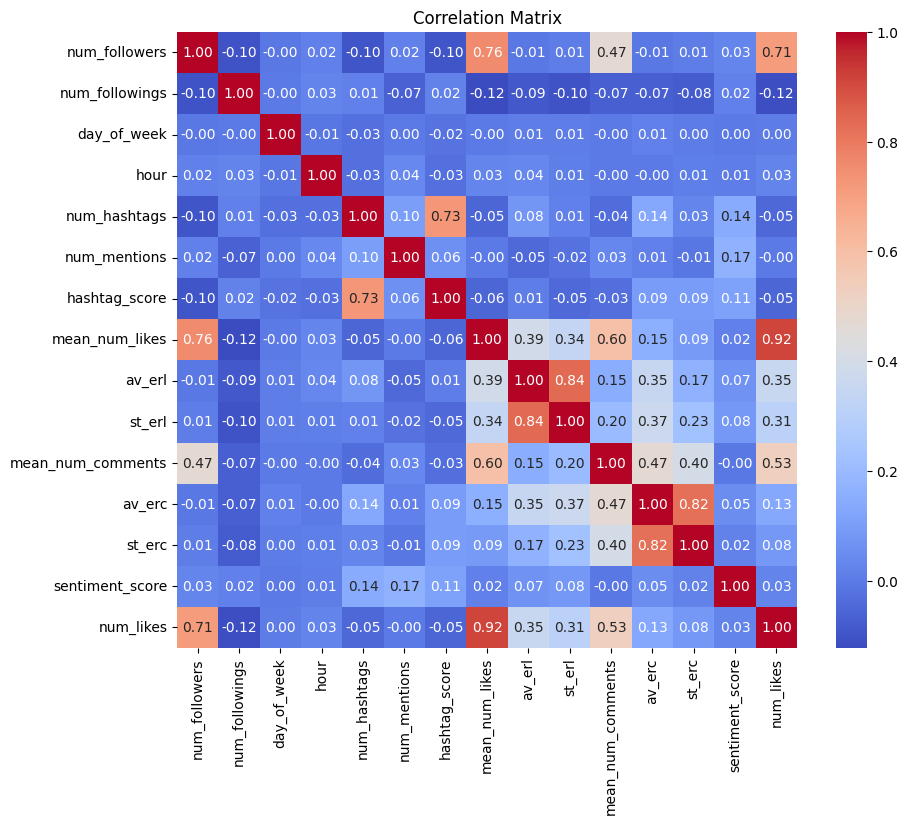

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df_train.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [57]:
# Prepare the data
X_train, X_test = df_train.iloc[:, :-1], df_test.iloc[:, :-1]  # Features (all columns except the last one)
y_train, y_test = df_train.iloc[:, -1], df_test.iloc[:, -1]   # Target variable (last column)

In [58]:
# to find other metrics too

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

# Your code to prepare the X_train, X_test, y_train, and y_test data goes here.

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(random_state=1, max_iter=500)
]

# Create an empty list to store the evaluation results
results_list = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    rae = np.sum(np.abs(y_pred - y_test)) / np.sum(np.abs(y_test - np.mean(y_test)))  # Calculate RAE
    rrse = np.sqrt(np.sum((y_pred - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))  # Calculate RRSE
    r2 = r2_score(y_test, y_pred)

    # Append the model evaluation results as a dictionary to the list
    results_list.append({
        'Model': model_name,
        'MAPE': mape,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'RAE': rae,
        'RRSE': rrse,
        'R2': r2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame with the model evaluation results
print(results_df)

                       Model      MAPE           MSE         MAE         RMSE  \
0           LinearRegression  0.421821  2.913953e+06  632.752189  1707.030436   
1                      Ridge  0.421820  2.914038e+06  632.771351  1707.055491   
2                      Lasso  0.420424  2.912539e+06  632.099878  1706.616346   
3                 ElasticNet  0.745113  4.696280e+06  792.387356  2167.090139   
4      DecisionTreeRegressor  0.167672  2.824561e+06  371.612653  1680.643048   
5      RandomForestRegressor  0.157522  1.203604e+06  307.494345  1097.089066   
6  GradientBoostingRegressor  0.480625  1.734455e+06  554.178531  1316.986988   
7        KNeighborsRegressor  0.612661  2.880799e+06  688.982117  1697.291637   
8               MLPRegressor  0.504343  3.052843e+06  660.048023  1747.238622   

        RAE      RRSE        R2  
0  0.257022  0.340836  0.883831  
1  0.257030  0.340841  0.883827  
2  0.256757  0.340754  0.883887  
3  0.321865  0.432695  0.812775  
4  0.150948  0.3355

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [59]:
results_df

,Model,MAPE,MSE,MAE,RMSE,RAE,RRSE,R2
0,LinearRegression,0.421821,2.913953e+06,632.752189,1707.030436,0.257022,0.340836,0.883831
1,Ridge,0.421820,2.914038e+06,632.771351,1707.055491,0.257030,0.340841,0.883827
2,Lasso,0.420424,2.912539e+06,632.099878,1706.616346,0.256757,0.340754,0.883887
3,ElasticNet,0.745113,4.696280e+06,792.387356,2167.090139,0.321865,0.432695,0.812775
4,DecisionTreeRegressor,0.167672,2.824561e+06,371.612653,1680.643048,0.150948,0.335568,0.887394
5,RandomForestRegressor,0.157522,1.203604e+06,307.494345,1097.089066,0.124903,0.219052,0.952016
6,GradientBoostingRegressor,0.480625,1.734455e+06,554.178531,1316.986988,0.225105,0.262958,0.930853
7,KNeighborsRegressor,0.612661,2.880799e+06,688.982117,1697.291637,0.279862,0.338892,0.885152
8,MLPRegressor,0.504343,3.052843e+06,660.048023,1747.238622,0.268109,0.348864,0.878294


In [49]:
# with the location 1,0 score

# to find other metrics too

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

# Your code to prepare the X_train, X_test, y_train, and y_test data goes here.

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a list of regression models
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    MLPRegressor(random_state=1, max_iter=500)
]

# Create an empty list to store the evaluation results
results_list = []

# Loop through each model
for model in models:
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)  # Calculate RMSE
    rae = np.sum(np.abs(y_pred - y_test)) / np.sum(np.abs(y_test - np.mean(y_test)))  # Calculate RAE
    rrse = np.sqrt(np.sum((y_pred - y_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))  # Calculate RRSE
    r2 = r2_score(y_test, y_pred)

    # Append the model evaluation results as a dictionary to the list
    results_list.append({
        'Model': model_name,
        'MAPE': mape,
        'MSE': mse,
        'MAE': mae,
        'RMSE': rmse,
        'RAE': rae,
        'RRSE': rrse,
        'R2': r2
    })

# Convert the list of dictionaries to a DataFrame
results_df = pd.DataFrame(results_list)

# Print the DataFrame with the model evaluation results
results_df

C:\Users\User\AppData\Roaming\Python\Python311\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


,Model,MAPE,MSE,MAE,RMSE,RAE,RRSE,R2
0,LinearRegression,0.417082,2.914985e+06,631.934798,1707.332807,0.256690,0.340897,0.883789
1,Ridge,0.417100,2.915061e+06,631.958350,1707.355108,0.256699,0.340901,0.883786
2,Lasso,0.416840,2.913211e+06,631.391045,1706.813165,0.256469,0.340793,0.883860
3,ElasticNet,0.701045,4.680555e+06,791.570777,2163.459101,0.321533,0.431970,0.813402
4,DecisionTreeRegressor,0.161516,2.715397e+06,359.549709,1647.846319,0.146048,0.329019,0.891746
5,RandomForestRegressor,0.158639,1.241054e+06,309.449083,1114.026036,0.125697,0.222433,0.950523
6,GradientBoostingRegressor,0.477196,1.773742e+06,555.961141,1331.819201,0.225829,0.265919,0.929287
7,KNeighborsRegressor,0.589147,2.879715e+06,682.133054,1696.972221,0.277080,0.338828,0.885196
8,MLPRegressor,0.505580,3.085965e+06,662.875574,1756.691529,0.269258,0.350752,0.876973


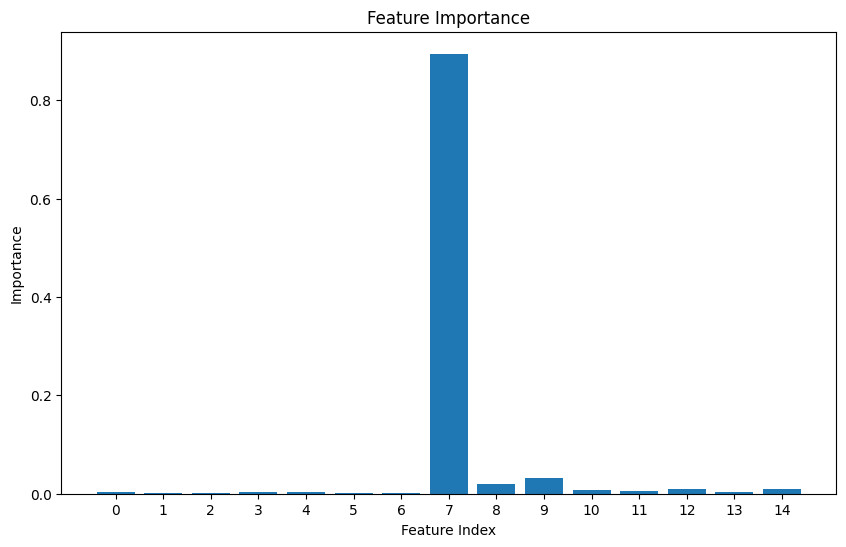

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error, r2_score

# Assuming you have already defined X_train, X_test, y_train, y_test as numpy arrays

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the RandomForestRegressor model
model = RandomForestRegressor(random_state=1)

# Fit the model
model.fit(X_train, y_train)

# Get feature importances
feature_importance = model.feature_importances_

# Get the corresponding feature names
feature_names = np.arange(X_train.shape[1])

# Create a DataFrame to store feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort the DataFrame by feature importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importance bar chart
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Feature Index')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(feature_importance_df['Feature'])
plt.show()


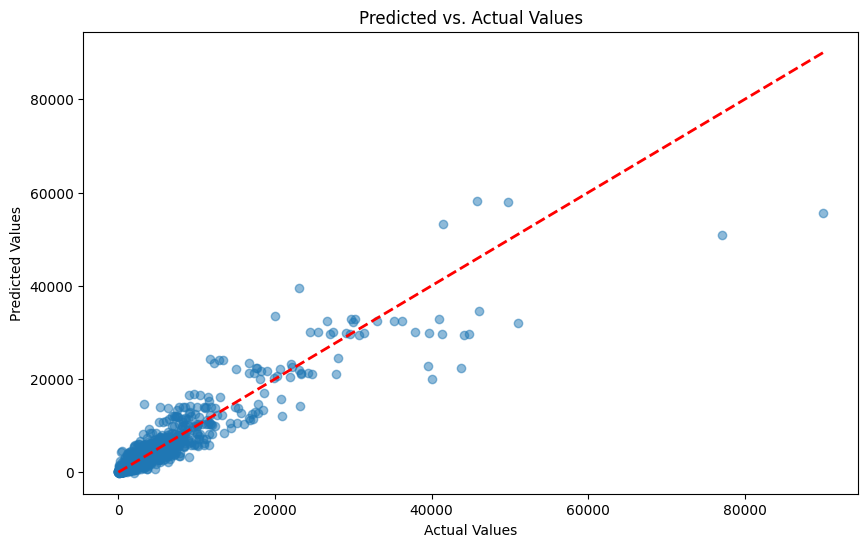

In [25]:
# Plotting predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.show()